# Car Price Prediction Project

> Kaggle Dataset:  https://kaggle.com/datasets/CooperUnion/cardataset

#### Project Walkthrough
* Data preparation
* EDA (Exploratory Data Analysis)
* Use linear regression for price prediction
(MSRP – Manufacturer suggested retail price)
* Understand the internals of linear regression
* Evaluating the model with RMSE (root mean squared error)
* Feature Engineering (creating new features)
* Regularization
* Using the model

# Data preparation – General Information
In the data preparation phase, several important steps need to be followed to ensure the dataset is suitable for analysis and modeling. Here are some key considerations:

*   Data Cleaning: This involves handling missing values, dealing with outliers, and ensuring consistency in data formats. Missing values can be imputed using various techniques, such as mean/median imputation or using advanced methods like K-nearest neighbors. Outliers may need to be addressed by either removing them or transforming them to fall within a reasonable range.
*   Data Integration: If you have multiple datasets related to car prices, you may need to combine them into a single dataset. This can involve matching and merging records based on common identifiers or performing data joins based on shared attributes.
*   Data Transformation: Sometimes, the existing variables may not be in a suitable format for analysis. In such cases, feature engineering techniques can be applied to create new variables that may have a better relationship with the target variable, such as transforming categorical variables into numerical ones using one-hot encoding or label encoding.
*   Feature Scaling: It is crucial to make sure that the features are on a similar scale to avoid bias in the model. Common techniques for feature scaling include standardization (mean of 0 and standard deviation of 1) or normalization (scaling values between 0 and 1).
*   Train-Validation Split: Before building the predictive model, it is essential to split the dataset into training and validating subsets. Typically, the majority of the data is used for training, while a smaller portion is reserved for evaluating the model’s performance. As I mentioned in past articles, a train-validate-test split might provide more reliable results.

By following these steps diligently, you can ensure that the data is well-prepared and ready for the subsequent stages of the car price prediction project.

# Loading Data and get an Overview

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data.csv')
len(df)

11914

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


> **Notes:** What you can see here, there is some inconsitency in the way of naming columns, sometimes the columns have underscores, sometimes not, sometimes the columns have capital letters, sometimes not.

In [5]:
df['Transmission Type']   #This works
df.Transmission Type    # but pandas series does not work because of naming convention.

SyntaxError: invalid syntax (2485869437.py, line 2)

# Cleaning

##### Normalise the dataset: To make all the columns names consistent. make them all lowercased and replace spaces with underscores.

In [6]:
# Pandas DataFrame has a field called columns, that contains the name of the columns columns is an index, 
# that is a special data structure in Pandas (very similar to series)
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [7]:
# like series it also has the str method for doing string manipulation what we 
# can do now is to apply the same string function to all column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [8]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### Normalise the Dataset - To make the data in the table consistent

In [9]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [10]:
df.dtypes == 'object'

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

In [11]:
# To get it as a series; object are the values and the column names are the index
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [12]:
# This is to convert index to string: Get access to the index of that series. Converting it to a python list with name strings
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [13]:
df['make'].str.lower().str.replace(' ', '_')

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [14]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [15]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [16]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

## Exploratory data analysis

> Exploratory data analysis (EDA) is an essential step in the data analysis process. It involves summarizing and visualizing the main characteristics of a dataset to gain insights and identify patterns or trends. By exploring the data, researchers can uncover hidden relationships between variables and make informed decisions.

> One common technique in EDA is **to calculate summary statistics like mean, median, and standard deviation to understand the distribution of the data.** These statistics provide a general overview of the dataset and can help identify potential outliers or unusual patterns.

> Visualizations also play a crucial role in EDA. **Graphical representations such as histograms, scatter plots, and box plots help visualize the data distribution, identify clusters or groups, and detect any unusual patterns or trends.** Visualizations can be particularly helpful in identifying relationships between variables or finding patterns that may not be immediately apparent.

> Another important aspect of EDA **is data cleaning. This involves handling missing values, outliers, and inconsistencies in the dataset.** By carefully examining the data, researchers can decide how to handle missing values (e.g., imputing or removing them) and identify and address outliers or errors.

> EDA is not a one-time process but rather an iterative one. As researchers delve deeper into the data, they may uncover additional questions or areas of interest that require further exploration. Through this iterative process, researchers refine their understanding of the data and uncover valuable insights.

> In conclusion, exploratory data analysis is a crucial step in the data analysis process. By summarizing, visualizing, and cleaning the data, researchers can uncover patterns, identify relationships, and make informed decisions. It provides the foundation for more advanced data analysis techniques and helps in the formation of hypotheses for further investigation.

In [17]:
for col in df.columns:
    print(col)
    print(df[col].head())
    print()

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object

model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object

year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object

engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64

engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64

transmission_type
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission_type, dtype: object

driven_wheels
0    rear_wheel_drive
1    rear_wheel_drive
2    rear_wheel_drive
3    rear_wheel_drive
4    rear_wheel_drive
Name: driven_wheels, dtype: object

number_of_doors
0    2.0
1   

In [18]:
# To check unique 
for col in df.columns:
    print(col)
    # print only the first 5 values
    # print(df[col].unique()[:5])
    print(df[col].unique())
    print("number of unique values: ",df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari' 'alfa_romeo' 'toyota' 'mclaren' 'maybach'
 'pontiac' 'porsche' 'saab' 'gmc' 'hyundai' 'plymouth' 'honda'
 'oldsmobile' 'suzuki' 'ford' 'cadillac' 'kia' 'bentley' 'chevrolet'
 'dodge' 'lamborghini' 'lincoln' 'subaru' 'volkswagen' 'spyker' 'buick'
 'acura' 'rolls-royce' 'maserati' 'lexus' 'aston_martin' 'land_rover'
 'lotus' 'infiniti' 'scion' 'genesis' 'hummer' 'tesla' 'bugatti']
number of unique values:  48

model
['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240' '2' '3_series_gran_turismo' '3_series' '300-class'
 '3000gt' '300' '300m' '300zx' '323' '350-class' '350z' '360' '370z' '3'
 '4_series_gran_coupe' '4_series' '400-class' '420-class' '456m'
 '458_italia' '4c' '4runner' '5_series_gran_turismo' '5_series'
 '500-class' '500e' '500' '500l' '500x' '550' '560-class' '570s' '575m'
 '57' '599' '5' '6_series_gran_coupe' '6_series' '600-class

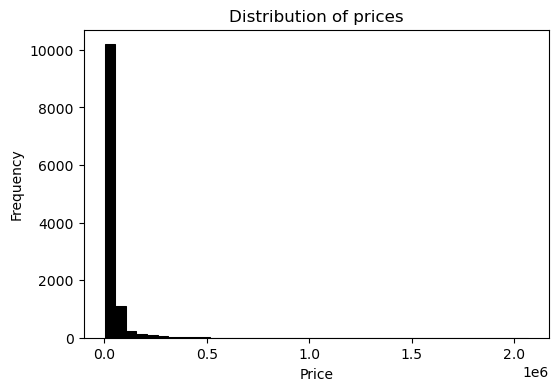

In [19]:
# bins = number of bars in the histogram
#1e6 means 10^6 = 1,000,000

plt.figure(figsize=(6, 4))

sns.histplot(df.msrp, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

> What you can see in the histogram, there are a lot of prices that are pretty cheap but only a few cars that are very expensive. That means this is a long-tail distribution (many prices in a small range, but a few prices in a wide range). We need to zoom in a bit to “ignore” the long tail with too less datapoints.

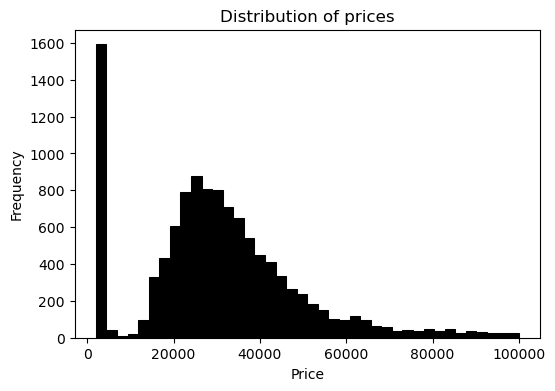

In [20]:
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp[df.msrp < 100000], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

> This kind of distribution (long tail, and the peak) is not good for ML models, because this distribution will confuse them.There is a way to get rid of the long tail, by applying logarithm to the price. This results in more compact values.

In [21]:
np.log([0, 1,10,1000,100000])
# problem with logarithm is when we have a 0, because log(0) does not exist
np.log([0 + 1, 1 + 1, 10 + 1, 1000 + 1, 100000 + 1])
# Output: array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])
# 
# to not always add 1 there is a NumPy function
np.log1p([0, 1,10,1000,100000])
# Output: array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

C:\Users\shbel\AppData\Local\Temp\ipykernel_10952\3418001468.py:1: RuntimeWarning: divide by zero encountered in log
  np.log([0, 1,10,1000,100000])


array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

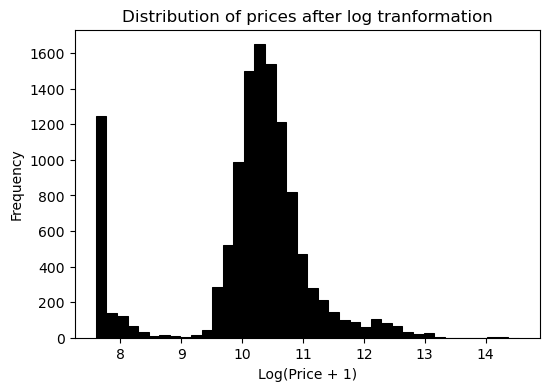

In [22]:
log_price = np.log1p(df.msrp)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

# Becomes a Normal distribution

> You can see the long tail is gone and you see a nice bell curve shape of a so called normal distribution, what is ideal for ML models. But still there is the strange peak. This could be the minimum price of $1,000 of the platform.

#### Missing Values

> As the title suggests, this is about finding missing values (NaN values). We can use the function in the following snippet to find that values. The sum function sums across columns and shows for each column how much missing values are there. This information is important when training a model.

In [23]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Validation framework

#  Setting up the validation framework
> To validate the model, we take the dataset and split it into three parts (train-val-test / 60-20-20). The reason why this is useful was mentioned in an earlier blog post. This means that we train the model on the training dataset, check if it works fine on the validation dataset, and leave the test dataset for the end. We only use the test dataset very occasionally, and only to check if the model is performing well. For each of these three parts, we create the feature matrix X and the target variable y (Xtrain, ytrain, Xval, yval, Xtest, ytest). So, what we need to do is calculate how much 20% is.

In [24]:
# Returns the number of records of the whole dataset
len(df)

11914

In [25]:
 # Calculate 20% of whole dataset
int(len(df) * 0.2)


2382

In [26]:
np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
# n_train = int(0.6 * n) # short by two because of int/approxiamtion
n_train = n - (n_val + n_test)

In [27]:
n, n_val + n_test + n_train

(11914, 11914)

In [28]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [29]:
df.iloc[[0, 1, 2]] #list 0f 0,1,2
df.iloc[:10]
df.iloc[10:20]
df.iloc[11910:]


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920
11913,lincoln,zephyr,2006,regular_unleaded,221.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,26,17,61,28995


In [30]:
df_val = df.iloc[:n_val] # For Validation
df_test = df.iloc[n_val:n_val+n_test]
df_train = df.iloc[n_val+n_test]

df_val
df_test
df_train

make                                  ford
model                                 flex
year                                  2016
engine_fuel_type          regular_unleaded
engine_hp                            287.0
engine_cylinders                       6.0
transmission_type                automatic
driven_wheels            front_wheel_drive
number_of_doors                        4.0
market_category      crossover,performance
vehicle_size                         large
vehicle_style                        wagon
highway_mpg                             23
city_mpg                                16
popularity                            5657
msrp                                 37800
Name: 4764, dtype: object

In [31]:
# Do it slightly differently
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

df_train
df_val
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
9532,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,47575
9533,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,24,18,1385,31940
9534,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,24,18,1385,38335
9535,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,24,18,1385,35870
9536,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,24,18,1385,28155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


> You might think that this concludes the division, but this approach brings us to the problem that the data list is sequential. That’s a problem when there is an order in the dataset. That means we need to shuffle, otherwise, there are BMWs only in one dataset. Generally shuffling is always a good idea.

In [32]:
idx = np.arange(n)
idx


array([    0,     1,     2, ..., 11911, 11912, 11913])

In [33]:
np.random.seed(2) # To make it reproduceable and get consistent result
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

> Using this shuffled index we can create our shuffled datasets for training, validation and for testing.

In [34]:
# Create shuffled datasets with correct size

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [35]:
# df_shuffled = df.iloc[idx]

# df_train = df_shuffled.iloc[:n_train].copy()
# df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
# df_test = df_shuffled.iloc[n_train+n_val:].copy()

> Now there is no order in the index column so we can reset index and drop the old index column.

In [36]:
#df_train = df_train.reset_index()
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [37]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

> Applying the log1p transformation to the price column to help the model perform well.

In [38]:
np.log1p(df_train.msrp)

0        9.575747
1        9.887663
2        9.893235
3        7.601402
4       10.937757
          ...    
7145    10.913287
7146    10.282472
7147    10.453803
7148    12.622481
7149    10.540620
Name: msrp, Length: 7150, dtype: float64

In [39]:
y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

In [40]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

> Final but very important step - remove msrp values from dataframes (df_train, df_val, df_test) to make sure that we don’t accidentally use it for training purposes.

In [41]:
# remobe msrp from the dataframe because it is the target variable.
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## Linear Regression

> Linear regression is a fundamental statistical technique used in the field of machine learning for solving regression problems. In simple terms, regression analysis involves predicting a continuous outcome variable based on one or more input features. That means the output of the model is a number.

> In the case of linear regression, the basic idea is to find the best-fitting linear relationship between the input features and the output variable. This relationship is represented by a linear equation of the form:
            y = w0 + w1x1 + w2x2 + … + wnxn

> Here, “y” represents the output variable, and x1, x2, …, xn represent the input features. The w0, w1, w2, …, wn are the coefficients that determine the relationship between the input features and the output variable.

> The goal of linear regression is to estimate the values of these coefficients in such a way that the sum of squared differences between the observed and predicted values is minimized. This minimization is typically achieved using a method called “ordinary least squares,” which calculates the best-fitting line by minimizing the sum of the squared errors between the predicted and actual values. 

> Linear regression is widely used in various fields, including economics, finance, social sciences, and engineering, to name just a few. It provides a simple and interpretable way to understand the relationship between the input features and the continuous outcome variable.

> In summary, linear regression is a powerful tool for predicting numerical values based on input features. By finding the best-fitting linear equation, it enables us to make accurate predictions and gain insights into the relationship between variables.

> Step back and focus on one observation
Just to recap what we know from the articles before, there is the function g(X) ~ y with: g as the model (in our example Linear regression), X as the feature matrix and y as the target (in our example price).

>Now let’s step back and look at only one observation. The corresponding function is g(xi) ~ yi with: xi as one car and yi as its price. So xi is one specific row of the feature matrix X. We can think of it as a vector with multiple elements (n different characteristics of this one car).

>xi = (xi1, xi2, xin) -> g(xi1, xi2, xin) ~ yi

nmm


In [100]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [101]:
# in code this would look like --> this is what we want to implement
xi = [453, 11, 86] 

def g(xi):
    # do something and return the predicted price
    return 10000

In [102]:
g(xi)
# Output: 10000

10000

In [103]:
# in code this would look like --> this is what we want to implement
xi = [453, 11, 86] 

# w0 = 0
w0 = 7.17

# w = [1, 1, 1]
w = [0.01, 0.04, 0.002]

def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range (n):
        pred = pred + w[j] * xi[j]

    return pred

In [104]:
linear_regression(xi)

12.312

In [105]:
np.expm1(12.312)

222347.2221101062

In [106]:
np.log1p(222347.2221101062)

12.312

### Linear Regression Vector Form

In [107]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [108]:
def dot(xi, w):
    n = len(xi)
     
    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]
         
    return res

In [109]:

def linear_regression(xi):
    return w0 + dot(xi, w) 


In [110]:
w_new = [w0] + w

In [111]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [112]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)  #make LR shorter


In [113]:
linear_regression(xi)

12.312

In [114]:
# Generalise it to miltiple car examples

xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

w_new =[w0] + w

In [115]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]

X = [x1, x2, x10]
X = np.array(X) # turns the list of list into a matrix
X


array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [116]:
def linear_regression(X):
    return X.dot(w_new) # Multiplication of this matrix and vector

## 2.7 Training a Linear Regression Model

In [117]:
def train_linear_regression(X, y):
    pass

In [118]:
# run this
X = [
    [148,   24, 1385],
    [132,   25, 2031],
    [453,   11,   86],
    [158,   24, 185],
    [172,   25, 201],
    [413,   11,   86],
    [38,   54, 185],
    [142,   25, 431],
    [453,   31,   86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [86]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [88]:
#list(np.column_stack([ones, ones, X]))

In [89]:
X = np.column_stack([ones, X])

In [119]:
# run this
# y = [100, 200, 150, 250, 100, 200, 150, 250, 120]
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [120]:
XTX = X.T.dot(X)

In [121]:
XTX_inv = np.linalg.inv(XTX)

In [122]:
#XTX.dot(XTX_inv).round(1)
#XTX.dot(XTX_inv)

In [123]:
#w = XTX_inv.dot(X.T).dot(y)
#w

In [124]:
w_full = XTX_inv.dot(X.T).dot(y)

In [125]:
w0 = w_full[0]
w = w_full[1:]

In [126]:
w0, w

(26.0841949768029, array([286.12285934,   3.93813107]))

In [127]:
# Run this

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]    

In [128]:
train_linear_regression(X, y)

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

## Car Price Baseline Model solution

In [129]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [130]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [133]:
base = ['engine_hp',  'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [140]:
df_train[base]
#df_train[base].values

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [141]:
X_train = df_train[base].values

In [142]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [143]:
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [146]:
X_train = df_train[base].fillna(0).values

In [147]:
# train_linear_regression(X_train, y_train)

(7.927257388070117,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [148]:
w0, w = train_linear_regression(X_train, y_train)

In [149]:
y_pred = w0 + X_train.dot(w)

In [150]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [151]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [162]:
X_val = prepare_X(df_val)

y_pred = w_0 + X_train.dot(w)

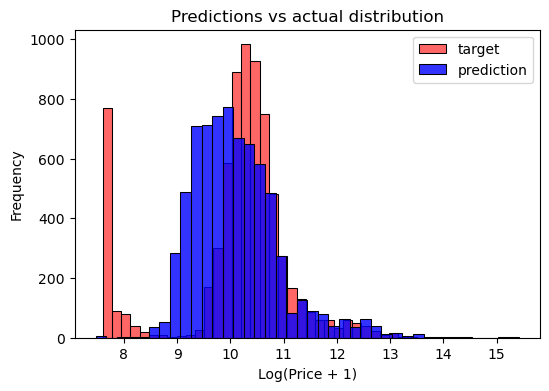

In [156]:
# color='#222222'    color='#aaaaaa' 
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color = 'red', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color = 'blue',  alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [157]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [158]:
rmse(y_train, y_pred)

0.7554192603920132

#### Validating the Model

In [159]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [160]:
rmse(y_val, y_pred)

0.7616530991301601

## Simple feature engineering

In [22]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [23]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred))

train 0.5175055465840046
validation 0.5172055461058335


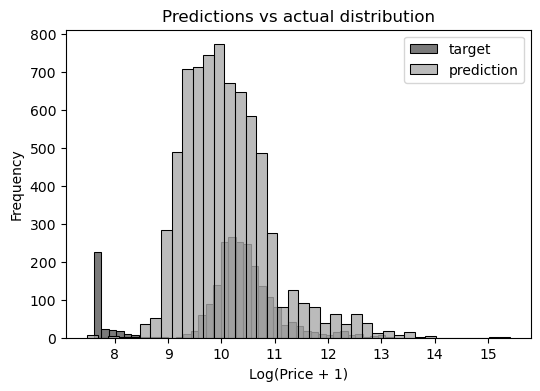

In [155]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [25]:
df['make'].value_counts().head(5)

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [26]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [27]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.5058876515487503
validation: 0.5076038849557035


In [28]:
df['engine_fuel_type'].value_counts()

regular_unleaded                                7172
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: engine_fuel_type, dtype: int64

In [29]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [30]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.4788482615078598
validation: 0.4748256737227088


In [31]:
df['transmission_type'].value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

In [32]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [33]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.4745380510924004
validation: 0.4685879194659198


In [34]:
df['driven_wheels'].value_counts()

front_wheel_drive    4787
rear_wheel_drive     3371
all_wheel_drive      2353
four_wheel_drive     1403
Name: driven_wheels, dtype: int64

In [35]:
df['market_category'].value_counts().head(5)

crossover             1110
flex_fuel              872
luxury                 855
luxury,performance     673
hatchback              641
Name: market_category, dtype: int64

In [36]:
df['vehicle_size'].value_counts().head(5)

compact    4764
midsize    4373
large      2777
Name: vehicle_size, dtype: int64

In [37]:
df['vehicle_style'].value_counts().head(5)

sedan            3048
4dr_suv          2488
coupe            1211
convertible       793
4dr_hatchback     702
Name: vehicle_style, dtype: int64

In [38]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheens_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [39]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 1607.4898641126447
validation: 830.8920785817741


In [40]:
w_0

-6.947006956027172e+17

## Regularization

In [41]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [42]:
X_train = prepare_X(df_train)

In [43]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

    0, -694700695602717184.00, 278.96, 694700695602667008.00
0.001, 7.19, -0.10, 1.81
 0.01, 7.18, -0.10, 1.81
  0.1, 7.05, -0.10, 1.78
    1, 6.22, -0.10, 1.56
   10, 4.39, -0.09, 1.08


In [44]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 1607.4898641126447
val 830.8920785817741


In [45]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.46431248945738135
val 0.46023949632611183


In [46]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.4602255729429437
0.0001 0.4602254945347706
 0.001 0.46022676266043516
  0.01 0.46023949632611183
   0.1 0.46037006958137333
     1 0.46182980426538955
     5 0.46840796275338076
    10 0.4757248100693528


In [47]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.46023949632611183
test: 0.4571813679692604


## Using the model

In [48]:
i = 2
ad = df_test.iloc[i].to_dict()
ad

{'make': 'toyota',
 'model': 'venza',
 'year': 2013,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 268.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'crossover,performance',
 'vehicle_size': 'midsize',
 'vehicle_style': 'wagon',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [49]:
X_test = prepare_X(pd.DataFrame([ad]))[0]
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
suggestion

28294.135912260714